# Regession using XGB Learning API

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Let's access Ames Housing Dataset from Datacamp. 
# Data is already pre-processed
url = 'https://assets.datacamp.com/production/repositories/943/datasets/4dbcaee889ef06fb0763e4a8652a4c1f268359b2/ames_housing_trimmed_processed.csv'

In [3]:
data = pd.read_csv(url)

In [4]:
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,Remodeled,GrLivArea,BsmtFullBath,BsmtHalfBath,...,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,PavedDrive_P,PavedDrive_Y,SalePrice
0,60,65.0,8450,7,5,2003,0,1710,1,0,...,0,0,0,0,1,0,0,0,1,208500
1,20,80.0,9600,6,8,1976,0,1262,0,1,...,0,1,0,0,0,0,0,0,1,181500
2,60,68.0,11250,7,5,2001,1,1786,1,0,...,0,0,0,0,1,0,0,0,1,223500
3,70,60.0,9550,7,5,1915,1,1717,1,0,...,0,0,0,0,1,0,0,0,1,140000
4,60,84.0,14260,8,5,2000,0,2198,1,0,...,0,0,0,0,1,0,0,0,1,250000


In [5]:
data.tail()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,Remodeled,GrLivArea,BsmtFullBath,BsmtHalfBath,...,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,PavedDrive_P,PavedDrive_Y,SalePrice
1455,60,62.0,7917,6,5,1999,1,1647,0,0,...,0,0,0,0,1,0,0,0,1,175000
1456,20,85.0,13175,6,6,1978,1,2073,1,0,...,0,1,0,0,0,0,0,0,1,210000
1457,70,66.0,9042,7,9,1941,1,2340,0,0,...,0,0,0,0,1,0,0,0,1,266500
1458,20,68.0,9717,5,6,1950,1,1078,1,0,...,0,1,0,0,0,0,0,0,1,142125
1459,20,75.0,9937,5,6,1965,0,1256,1,0,...,0,1,0,0,0,0,0,0,1,147500


In [6]:
data.shape

(1460, 57)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MSSubClass            1460 non-null   int64  
 1   LotFrontage           1460 non-null   float64
 2   LotArea               1460 non-null   int64  
 3   OverallQual           1460 non-null   int64  
 4   OverallCond           1460 non-null   int64  
 5   YearBuilt             1460 non-null   int64  
 6   Remodeled             1460 non-null   int64  
 7   GrLivArea             1460 non-null   int64  
 8   BsmtFullBath          1460 non-null   int64  
 9   BsmtHalfBath          1460 non-null   int64  
 10  FullBath              1460 non-null   int64  
 11  HalfBath              1460 non-null   int64  
 12  BedroomAbvGr          1460 non-null   int64  
 13  Fireplaces            1460 non-null   int64  
 14  GarageArea            1460 non-null   int64  
 15  MSZoning_FV          

In [8]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [9]:
# Import XGB
import xgboost as xgb

In [10]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [11]:
X, y = data.iloc[:,:-1], data.iloc[:,-1]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [13]:
# Create DMatrix
DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test = xgb.DMatrix(data=X_test, label=y_test)

In [14]:
# Create a dictionary for booster params
params = {'objective':'reg:squarederror','booster':'gblinear'}

In [15]:
# Boosting rounds = 5
num_boost_round = 5

In [16]:
# Train the model
xg_reg = xgb.train(params=params, dtrain=DM_train, num_boost_round=num_boost_round)

In [17]:
preds = xg_reg.predict(DM_test)

In [18]:
# Compute and print the RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

RMSE: 46450.067579


In [19]:
# Regularization in XGBoost

In [20]:
# l1 Regularizarion Technique
params_ = {'objective':'reg:squarederror', 'max_depth':5}
l1_params = [1, 10, 100]
rmse_l1 = []

In [21]:
for reg in l1_params:
    params_['alpha'] = reg
    cv_results = xgb.cv(dtrain=DM_train,params=params, nfold=4, num_boost_round=10, metrics='rmse', as_pandas=True, seed=21)
    rmse_l1.append(cv_results['test-rmse-mean'].tail(1).values[0])
rmse_df = pd.DataFrame(list(zip(l1_params, rmse_l1)), columns=['l1','rmse'])
rmse_df

,l1,rmse
0,1,42321.589122
1,10,41762.578772
2,100,42044.991908


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

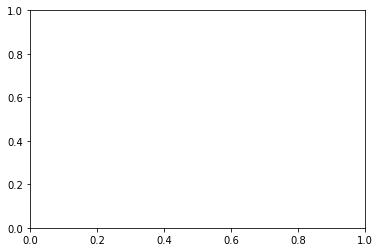

In [22]:
xgb.plot_tree(xg_reg)